# **Feature Matching**
### **Methods**
- **Brute-Force Matching with ORB Descriptors**
- **Brute-Force Matching with SIFT Descriptors and Ratio Test**
- **FLANN based Matcher**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [3]:
reeses = cv2.imread("../Image_processing/Resources/DATA/reeses_puffs.png", 0)

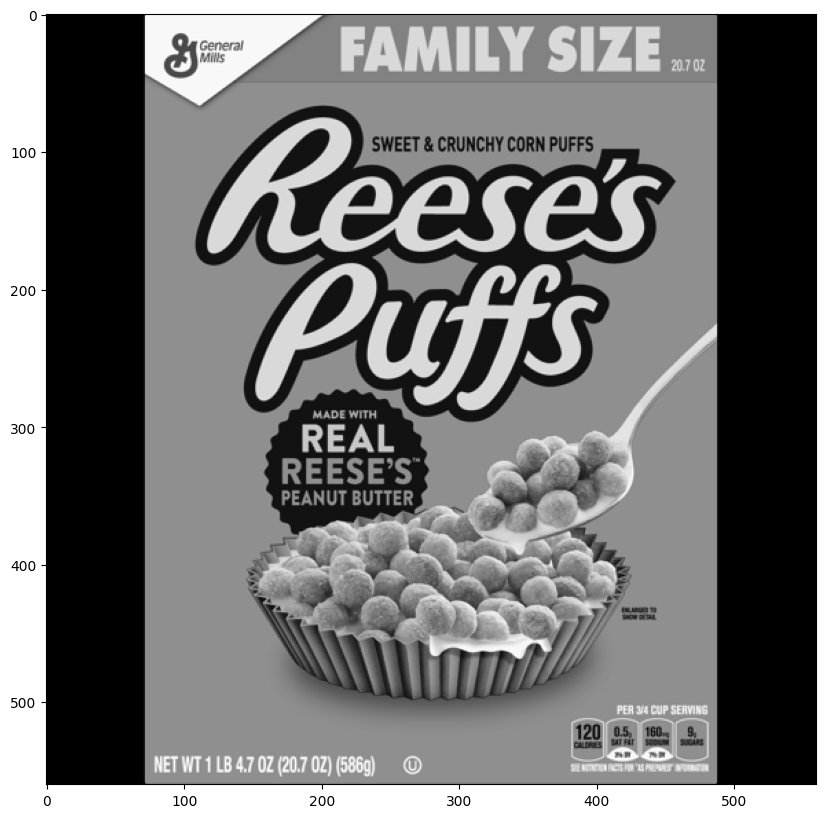

In [4]:
display(reeses)

In [5]:
cereals = cv2.imread("../Image_processing/Resources/DATA/many_cereals.jpg", 0)

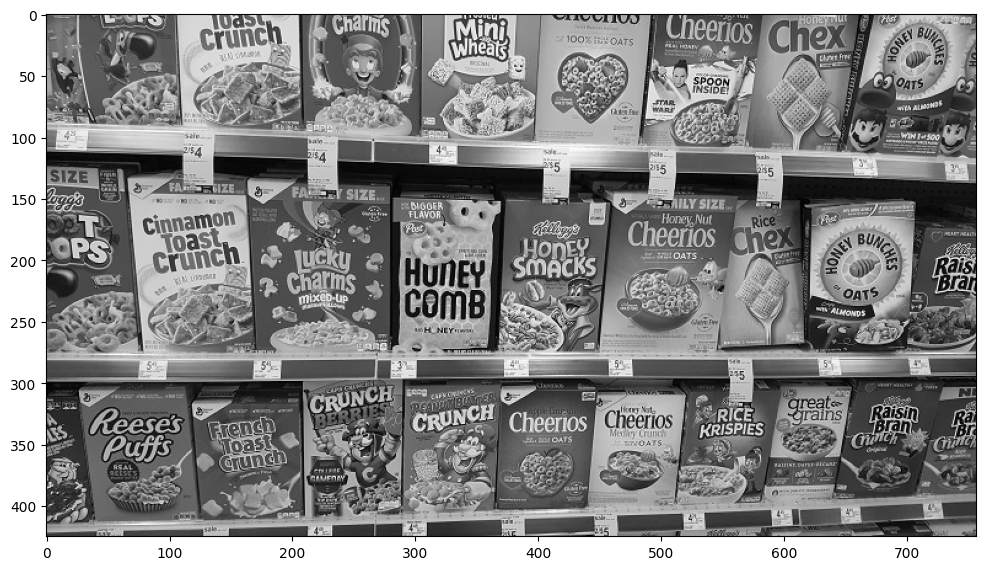

In [6]:
display(cereals)

## **1. ORB**

In [7]:
orb = cv2.ORB_create()

In [8]:
kp1, des1 = orb.detectAndCompute(reeses, None)
kp2, des2 = orb.detectAndCompute(cereals, None)

In [9]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [10]:
matches = bf.match(des1, des2)

In [11]:
single_match = matches[0]
matches[:5]

(< cv2.DMatch 000002AF56CFC6B0>,
 < cv2.DMatch 000002AF47D13530>,
 < cv2.DMatch 000002AF58B82D70>,
 < cv2.DMatch 000002AF58B82A50>,
 < cv2.DMatch 000002AF58B82830>)

In [12]:
single_match.distance, len(matches)

(56.0, 139)

In [13]:
matches = sorted(matches, key=lambda x : x.distance)

In [14]:
reeses_matches = cv2.drawMatches(reeses, kp1, cereals, kp2, matches[:25], None, flags=2)

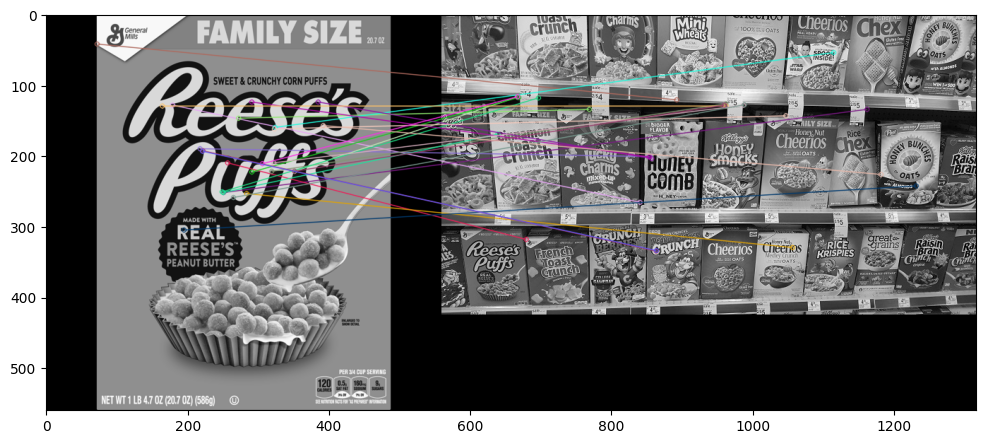

In [15]:
display(reeses_matches)

---
## **2. SIFT**

In [16]:
sift = cv2.xfeatures2d.SIFT_create()

In [17]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [18]:
bf = cv2.BFMatcher()

In [19]:
matches = bf.knnMatch(des1, des2, k=2)

In [20]:
good = []

# less distance == better match
# ratio match-1 < 75% match-2
for match1, match2 in matches:
    # if match-1 distance is < 75% of match-2 distance
    # then descriptor was a good match, lets keep it 
    if match1.distance < 0.75 * match2.distance:
        good.append([match1])

In [21]:
good[:10]

[[< cv2.DMatch 000002AF58C56150>],
 [< cv2.DMatch 000002AF58C56CD0>],
 [< cv2.DMatch 000002AF58C57290>],
 [< cv2.DMatch 000002AF58C572D0>],
 [< cv2.DMatch 000002AF58C574D0>],
 [< cv2.DMatch 000002AF58C57AD0>],
 [< cv2.DMatch 000002AF58C57DD0>],
 [< cv2.DMatch 000002AF58C57F50>],
 [< cv2.DMatch 000002AF5B340310>],
 [< cv2.DMatch 000002AF5B340550>]]

In [22]:
len(good), len(matches)

(79, 1501)

In [23]:
matches[:5]

((< cv2.DMatch 000002AF58C56150>, < cv2.DMatch 000002AF58C55BF0>),
 (< cv2.DMatch 000002AF58C56190>, < cv2.DMatch 000002AF58C55C50>),
 (< cv2.DMatch 000002AF58C55770>, < cv2.DMatch 000002AF58C55BB0>),
 (< cv2.DMatch 000002AF58C557B0>, < cv2.DMatch 000002AF58C56250>),
 (< cv2.DMatch 000002AF58C55FD0>, < cv2.DMatch 000002AF58C55430>))

In [24]:
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)

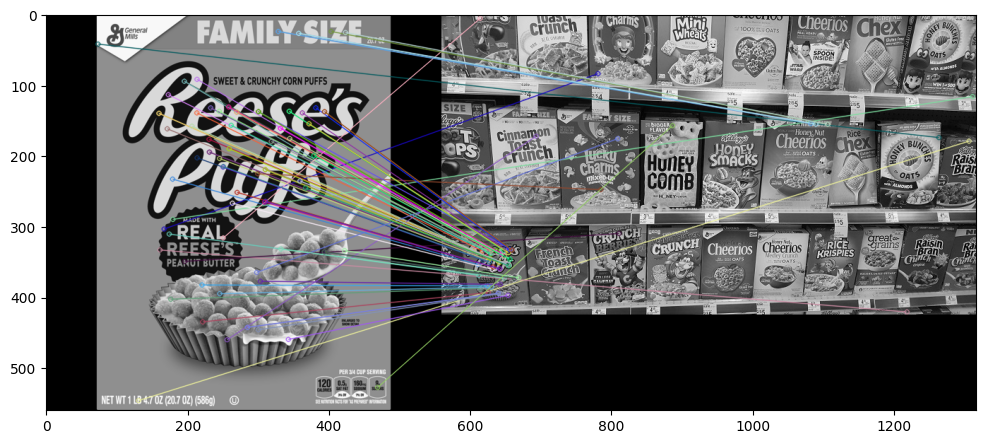

In [25]:
display(sift_matches)

---
## **3. FLANN**

In [26]:
sift = cv2.xfeatures2d.SIFT_create()

In [27]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [28]:
# FLANN(It only finds optimal near neighbours)
flann_index_kdtree = 0
index_params = dict(algorithm=flann_index_kdtree, trees=5)
search_params = dict(checks=50)

In [29]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [30]:
matches = flann.knnMatch(des1, des2, k=2)

In [31]:
matchesMask = [[0, 0] for i in range(len(matches))]

In [32]:
for i, (match1, match2) in enumerate(matches):
    if match1.distance < 0.7 * match2.distance:
        matchesMask[i] = [1, 0]

In [33]:
draw_params = dict(matchColor=(0,255,0), singlePointColor=(255, 0, 0),matchesMask=matchesMask, flags=2)

In [34]:
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)

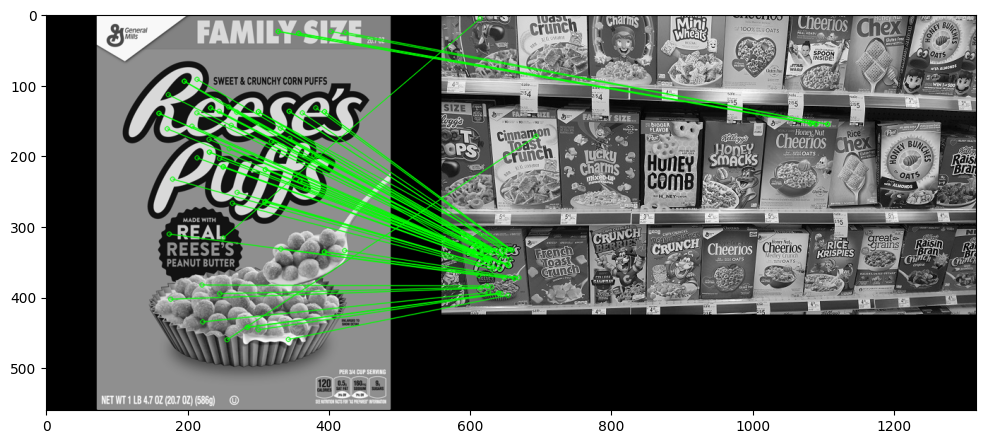

In [35]:
display(flann_matches)

---
## **Part-2**

In [36]:
sift = cv2.xfeatures2d.SIFT_create()

In [37]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [38]:
bf = cv2.BFMatcher()

In [39]:
matches = bf.knnMatch(des1, des2, k=2)

In [42]:
good = []
for m1, m2 in matches:
    # Less distance = batter match
    if m1.distance < 0.75 * m2.distance:
        good.append([m1])

In [45]:
good.__len__(), matches.__len__()

(79, 1501)

In [47]:
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)

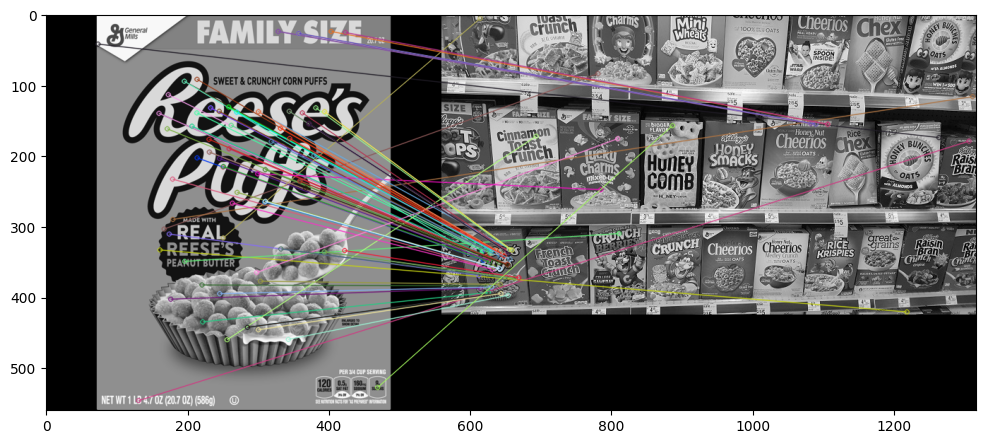

In [48]:
display(sift_matches)

In [49]:
sift = cv2.xfeatures2d.SIFT_create()

In [50]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [51]:
# FLANN
flann_index_kdtree = 0
index_params = dict(algorithm=flann_index_kdtree, trees=5)
search_params = dict(checks=50)

In [52]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [57]:
matches = flann.knnMatch(des1, des2, k=2)

In [58]:
matchesMask = [[0, 0] for i in range(len(matches))]

In [60]:
for i, (m1, m2) in enumerate(matches):
    if m1.distance < 0.75 * m2.distance:
        matchesMask[i] = [1, 0]

In [61]:
draw_params = dict(matchColor=(0, 255, 0), singlePointColor=(255, 0, 0), matchesMask=matchesMask, flags=0)

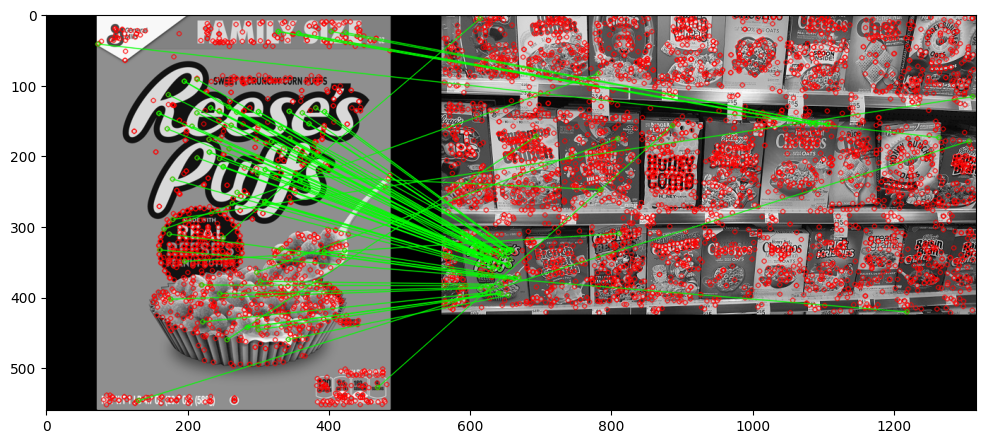

In [63]:
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)
display(flann_matches)